In [15]:
from model_evaluator import evaluate_model_performance
from predictor import FutPredict 
import pandas as pd
import glob

In [ ]:
csv_files = glob.glob("data/*.csv")
df_list = [pd.read_csv(file) for file in csv_files]
merged_df = pd.concat(df_list, ignore_index=True)

merged_df.rename(columns={'FTHG': 'home_team_goal', 'FTAG': 'away_team_goal',
                          'HS': 'home_team_shot', 'AS': 'away_team_shot',
                          'HST': 'home_team_shoton','AST': 'away_team_shoton',
                          'HF': 'home_team_foulcommit', 'AF': 'away_team_foulcommit',
                          'HC': 'home_team_corner', 'AC': 'away_team_corner',
                          'HY': 'home_team_yellowcard', 'AY': 'away_team_yellowcard',
                          'HR': 'home_team_redcard', 'AR': 'away_team_redcard'}, inplace=True)

merged_df_odds = merged_df[['Date', 'HomeTeam', 'AwayTeam', 'home_team_goal', 'away_team_goal',
       'home_team_shot', 'away_team_shot', 'home_team_shoton',
       'away_team_shoton', 'home_team_corner', 'away_team_corner',
       'home_team_foulcommit', 'away_team_foulcommit', 'home_team_yellowcard',
       'away_team_yellowcard', 'home_team_redcard', 'away_team_redcard','B365H','B365D','B365A']]

merged_df["Date"] = pd.to_datetime(merged_df["Date"], format="%d/%m/%Y")
merged_df = merged_df.sort_values(by='Date', ascending=True).reset_index(drop=True)

merged_df_odds["Date"] = pd.to_datetime(merged_df_odds["Date"], format="%d/%m/%Y")
merged_df_odds = merged_df_odds.sort_values(by='Date', ascending=True).reset_index(drop=True)

data = merged_df.copy()
data = data.dropna().reset_index(drop=True)

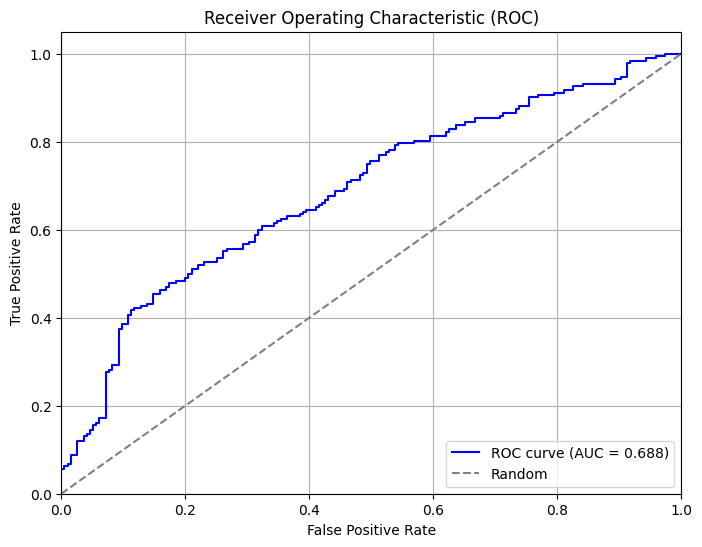


Model Değerlendirme Sonuçları:
Baseline (Ortalama Kazanma Oranı): 0.496
Accuracy: 0.633
Precision: 0.647
Recall: 0.647
AUC: 0.688
Lift: 1.276

Tahmin Detayları:
Doğru Pozitif (TP): 110
Yanlış Pozitif (FP): 60
Doğru Negatif (TN): 135
Yanlış Negatif (FN): 82

Toplam Doğru Tahmin: 245
Toplam Tahmin: 387

Model Performans Metrikleri:
baseline: 0.496
accuracy: 0.633
precision: 0.647
recall: 0.573
auc: 0.688
lift: 1.276
true_positive: 110.000
false_positive: 60.000
true_negative: 135.000
false_negative: 82.000
correct_predictions: 245.000
total_predictions: 387.000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


predictor = FutPredict(history_size=6)

match_data = predictor.prepare_match_data(data)
historical_features = predictor.calculate_historical_features(match_data)

X, y = predictor.prepare_model_features(historical_features)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

metrics = evaluate_model_performance(model, X_test, y_test)

print("\nModel Performans Metrikleri:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.3f}")